<a href="https://colab.research.google.com/github/GabrielaRomoM/CDS-2025-1/blob/main/FeedbackResponse.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install control

In [ ]:
#@title Librerias
from control import matlab as ml
import matplotlib.pyplot as plt
import numpy as np
import sympy as sym
from sympy.physics.control.lti import TransferFunction
from sympy.physics.control.control_plots import pole_zero_plot, bode_plot, impulse_response_plot, step_response_plot, ramp_response_plot

Función de Transferencia:  $$ H(s)= \frac {s-b}{s+a} $$



In [ ]:
#@title Definición de las variables de la función de transferencia
A, B = sym.symbols("A B", real = True, positive = True)
s = sym.symbols("s", complex = True)
v = {A : 4, B : 8}

# Retroalimentación #1

Con una retroalimentación en lazo cerrado (-1) entonces:
$$H(s)=\frac{s-b}{2s+(a-b)}$$

De tal forma que $s=\frac{b-a}{2}$, por lo tanto, podemos decir que para que el sistema sea estable se debe cumplir que $(b-a)<0$, tal que $b<a$.

En el caso de la respuesta impulso, el impulso introducido al sistema no afecta su función de transferencia ya que en laplace un impulso esta dado por 1.

Para la respuesta al escalón, el escalón corresponde a $\frac{1}{s}$, por lo tanto:
$$H(s)=\frac{s-b}{2s^2+(a-b)s}$$

In [ ]:
#Función de Transferencia
H = (s - B)/(2*s + A - B)
print("Función de Transferencia:")
H

Función de Transferencia:


(-B + s)/(A - B + 2*s)

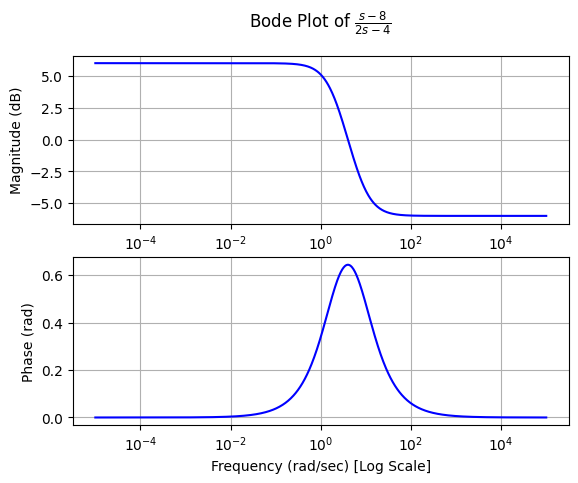

In [ ]:
# Diagrama de Bode y Fase
num, den = sym.fraction(H.subs(v))
F1 = TransferFunction(num, den, s) #numerador y denomirador función de transferencia con valores evaluados de A y B
bode_plot(F1)

## Respuestas

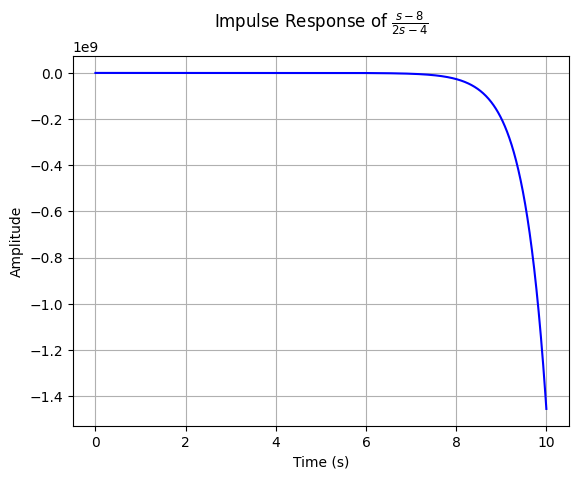

In [ ]:
#Respuesta al impulso
impulse_response_plot(F1)

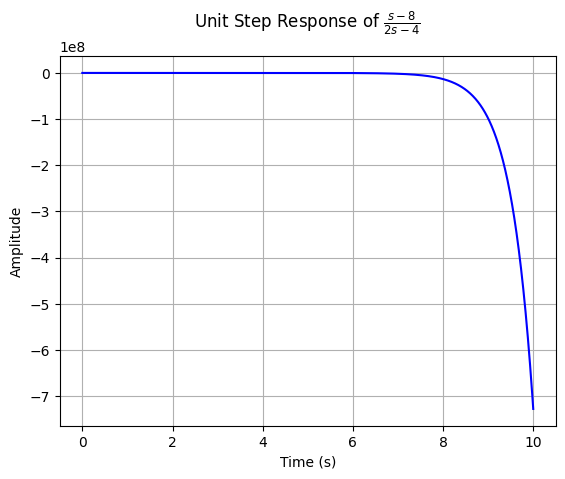

In [ ]:
#Respuesta al escalón
step_response_plot(F1)

# Retroalimentación #2

Ahora, si el sistema esta retroalimentado con un integrador ($-\frac{1}{s}$) entonces:
$$H(s)= \frac{s^2-bs}{s^2+(a+1)s-b}$$

Encontrando los polos de la ecuación característica ($s^2+(a+1)s -b$), tenemos que:

$$s = \frac{-(a+1)±\sqrt{(a+1)^2+4}}{2}$$

Por lo tanto, para decir que el sistema es estable se debe cumplir que $\sqrt{(a+1)^2+4}<(a+1)$

En el caso de la respuesta impulso, el impulso introducido al sistema no afecta su función de transferencia ya que en laplace un impulso esta dado por 1.

Para la respuesta al escalón, el escalón corresponde a $\frac{1}{s}$, por lo tanto:
$$H(s)=\frac{s^2-bs}{2s^3+(a-b)s^2-bs}$$



* ¿Cuál es el efecto del integrador en el lazo cerrado?

Permite que se estabilice para casos donde b es mayor que a. Si observamos las funciones del sistema de acuerdo a la retroalimentación y las respuestas, nos damos cuenta que en el primer caso, solo hay estabilidad cuando a es mayor. Tomando la suposición de que a = 4 y b = 8, podemos decir que el sistema es inestable en el primer caso de retroalimentación dado que b es mayor. Pero usando una retroalimentación con integrador, el sistema se convierte en estable.



In [ ]:
# Función de Transferencia con retroalimentación -1
H2 = (s**2 - B*s)/(s**2 + s*(A+1) - B)
print("Función de Transferencia:")
H2

Función de Transferencia:


(-B*s + s**2)/(-B + s**2 + s*(A + 1))

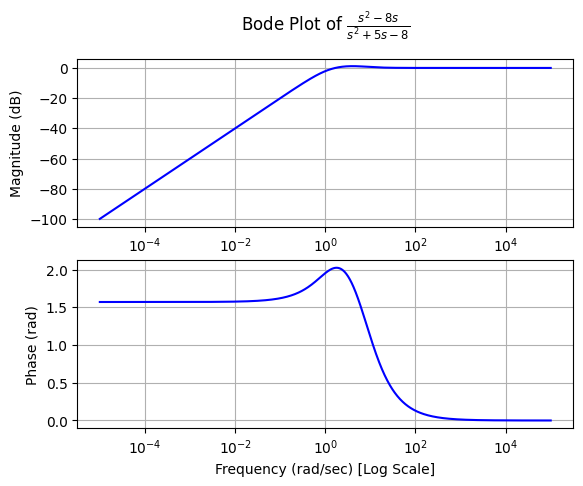

In [ ]:
# Diagrama de Bode y Fase
num, den = sym.fraction(H2.subs(v))
F2 = TransferFunction(num, den, s) #numerador y denomirador función de transferencia con valores evaluados de A y B
bode_plot(F2)

### Respuestas

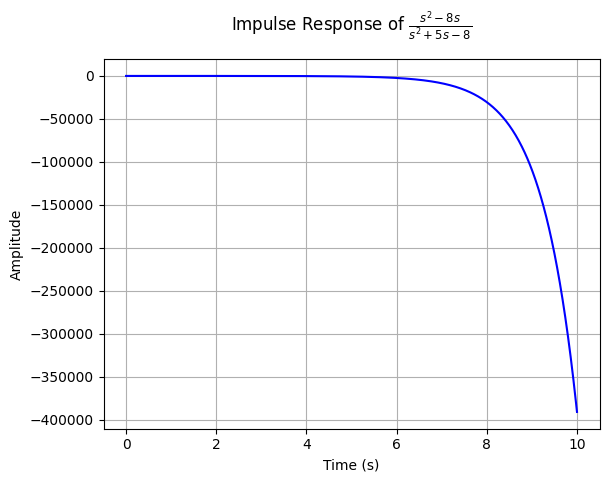

In [ ]:
# Respuesta al impulso
impulse_response_plot(F2)

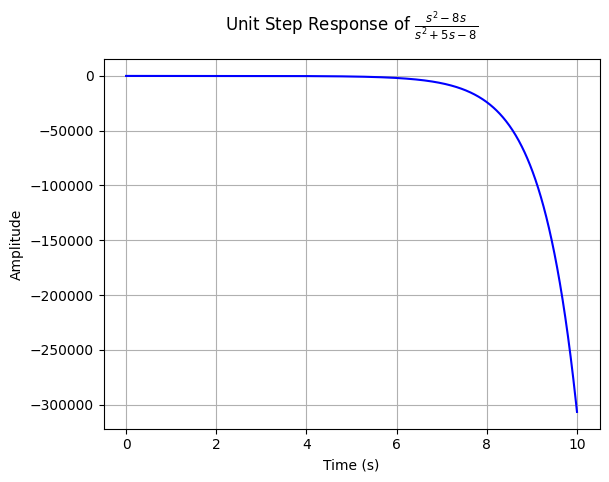

In [ ]:
# Respuesta al escalón
step_response_plot(F2)